In [1]:
from resources.resources import *

/Users/pataan/Dropbox/DPhil/DAPPER


The ensemble approach is an approximation in Bayesian inference. Instead of computing the full posterior distributions, we instead try to generate ensembles from them.

An ensemble is an *iid* sample. I.e. a set of "members" ("particles", or "sample points") that have been drawn ("sampled") independently from the same distribution. With regards to the EnKF, these assumptions are generally tenous, but pragmatic.

Ensembles can be used to characterize uncertainty: either by reconstructing (estimating) the distribution from which it is assumed drawn, or by computing various *statistics* such as the mean, median, variance, covariance, skewness, confidence intervals, etc (any function of the ensemble is a "statistic"). This is illustrated by the code below.

<IPython.core.display.Javascript object>


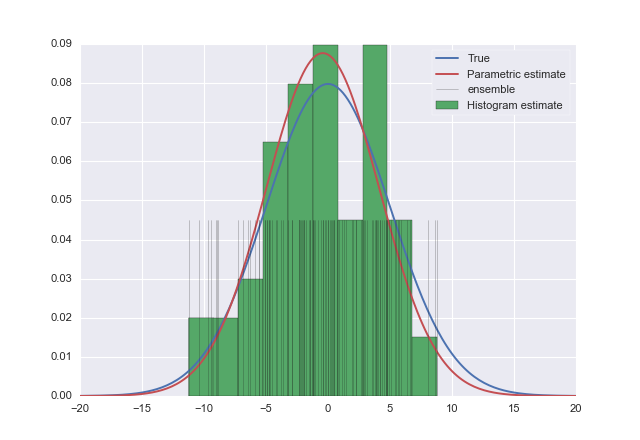

In [2]:
mu  = 0
P   = 25    
P12 = sqrt(P)

xx = linspace(-20,20,201)
plt.plot(xx,ss.norm.pdf(xx,mu,sqrt(P)),label="True");

m = 1   # length of state vector
N = 100 # ensemble size
E = mu + P12*randn((N,m))

plt.hist(E,normed=1,bins=max(10,N//30),label="Histogram estimate")
plt.plot(xx,ss.norm.pdf(xx,np.mean(E),sqrt(np.var(E))),label="Parametric estimate")
plot_ensemble(E)
plt.legend();

**Exc:** Which approximation looks better: Histogram or the parametric? The EnKF takes advantage of this.

**Exc:** If the histogram bars are normalized by the value of the pdf at their location. How do you expect the resulting histogram to look?

**Exc:** Multivariate Gaussian sampling. Suppose $\mathbf{z}$ is a standard Gaussian, i.e. $p(\mathbf{z}) = N(\mathbf{z}|0,\mathbf{I}_m)$, where $\mathbf{I}_m$ is the $m$-dimensional identity matrix.
 * (a). Let $\mathbf{x} = \mathbf{L}\mathbf{z} + \mathbf{b}$. 
    Show that $p(\mathbf{x}) = N(\mathbf{x}|\mathbf{b}, \mathbf{L}^{}\mathbf{L}^T)$.
    You may take it for granted that [the sum of two Gaussian random variables is again a Gaussian](https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables#Proof_using_convolutions).
 * (b). $\mathbf{z}$ can be sampled using `randn((m,1))`. How (where) is `randn` defined?
 * (c). Consider the code below. How do you sample from $\mathbf{x}$ ? 

In [3]:
m   = 3 # ndim
mu  = 10*ones(m)
P   = diag(1+arange(m))
L   = np.linalg.cholesky(P)
print("True mean and cov:")
print(mu)
print(P)

### INSERT ANSWER (c) ###
z = randn((m,1))
x = mu + L @ z

True mean and cov:
[ 10.  10.  10.]
[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [2]:
#show_answer('Gaussian sampling a')

In [3]:
#show_answer('Gaussian sampling b')

In [4]:
#show_answer('Gaussian sampling c')

 * (d). Now sample $N = 100$ realizations of $\mathbf{x}$ and collect them in an $m$-by-$N$ "ensemble matrix" $\mathbf{E}$. The main thing to figur out here is: how to add the mean vector to the ensemble matrix.

In [6]:
N  = 100 # ensemble size

### INSERT ANSWER (d) ###

# Use the code below to assess whether you got it right
x_bar = np.mean(E,axis=1)
P_bar = np.cov(E)
print("Estimated mean and cov:")
with printoptions(precision=1):
    print(x_bar)
    print(P_bar)
plt.matshow(P_bar,cmap="Blues"); plt.grid('off');

NameError: name 'E' is not defined

In [5]:
#show_answer('Gaussian sampling d')

**Exc:** How erroneous are the ensemble estimates on average?

In [7]:
#show_answer('Average sampling error')

**Exc:** Given the previous ensemble matrix $\mathbf{E}$, compute its sample mean $\overline{\mathbf{x}}$ and covariance matrix, $\overline{\mathbf{P}}$. Formulea are provided by eqn (2.9) of the [theoretical companion](./resources/DA_intro.pdf#page=11):
$$ \overline{\mathbf{x}} = \frac{1}{N}   \sum_{n=1}^N \mathbf{x}_n \\
   \overline{\mathbf{P}} = \frac{1}{N-1} \sum_{n=1}^N (\mathbf{x}_n - \overline{\mathbf{x}}) (\mathbf{x}_n - \overline{\mathbf{x}})^T  $$

In [11]:
# Don't use numpy's mean, cov
def estimate_mean_and_cov(E):
    m, N = E.shape
    
    ### INSERT ANSWER ###
    
    return x_bar, P_bar

x_bar, P_bar = estimate_mean_and_cov(E)
print(x_bar)
print(P_bar)

[ 10.039933   9.994108   9.962597]
[[ 1.054358 -0.133174  0.218513]
 [-0.133174  1.858056 -0.086248]
 [ 0.218513 -0.086248  2.685852]]


In [8]:
#show_answer('ensemble moments')

**Exc:** Why is the normalization by $(N-1)$ for the covariance computation?

In [17]:
#show_answer('Why (N-1)')

**Exc:** Like Matlab, Python (numpy) is quicker if you "vectorize" loops. This is emminently possible with computations of ensemble moments. 
 * (a). Show that $\overline{\mathbf{P}}$ may also be computed as $\mathbf{A} \mathbf{A}^T /(N-1)$. Also see eqn (2.12) of the [theoretical companion](./resources/DA_intro.pdf#page=11)
 * (b). Code up this formula and insert it in `estimate_mean_and_cov(E)`

In [13]:
#show_answer('ensemble moments vectorized')

**Exc:** Implement the cross-covariance estimator $\overline{Cov(\mathbf{x}^1,\mathbf{x}^2)} = \frac{1}{N-1} \sum_{n=1}^N (\mathbf{x}^1_n - \overline{\mathbf{x}^1}) (\mathbf{x}_n^2 - \overline{\mathbf{x}^2})^T  $

In [16]:
def estimate_cross_cov(E1,E2):
    ### INSERT ANSWER ###

SyntaxError: unexpected EOF while parsing (<ipython-input-16-cb822f82adaf>, line 2)

In [14]:
#show_answer('estimate cross')

**Exc:**
 * (a). What's the difference between error residual?
 * (b). What's the difference between error and bias?
 * (c). Show `MSE = RMSE^2 = Bias^2 + Var`

In [15]:
#show_answer('errors')

**Exc:** Suppose $\mathbf{x}$ is $m$-dimensional and has a covariance matrix $\mathbf{B}$.
 * (a). What's the size of $\mathbf{B}$?
 * (b). How many "flops" (approximately, i.e. to leading order) are required to solve the "weighted average" form of the KF update equation, eqn (A.16a) of the [DA intro](resources/DA_intro.pdf#page=29) ?
 * (c). How much memory (bytes) is required to hold its covariance matrix $\mathbf{B}$ ?
 * (d). How many mega bytes's is this if $m$ is a million?

In [16]:
#show_answer('Cov memory')

This is one of the principal reasons why basic extended KF is infeasible for DA. Although not developed here, the EnKF avoids the explicit computation of covariance matrices, working instead with reduced-rank square roots.


### Next: [Writing your own EnKF](T6 - Writing your own EnKF.ipynb)